In [1]:
import os
os.chdir("../src")
print(os.getcwd())

import copy
import numpy as np
import math
import operator
import matplotlib.pyplot as plt

from poc.run_cts_agent import train_sac, train_td3
from poc.cts_vis_utils import visualize


%matplotlib inline
%load_ext autoreload
%autoreload 2

/u/clw4542/research/rl_ifo_mujoco/src


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages

### PBRS on Pointworld

The purpose of this notebook is to explore whether we can show the benefits of PBRS on Pointworld. 

In [2]:
# run experiments
base_path = "/scratch/cluster/clw4542/pointworld_pbrs_results"

def run_expts(expt_dict, n_runs=5):
    for expt_name, expt_settings in expt_dict.items():
        for run_id in range(n_runs):
            expt_settings["expt_params"]["run_id"] = run_id
            task_vars = expt_settings["task_vars"]
            task_log_name = expt_settings["task_log_name"]
            expt_params = expt_settings["expt_params"]
            train_fn = expt_settings["train_fn"]

            train_fn(task_vars, task_log_name, **expt_params)

## SAC on Pointworld

#### NOTE THAT N_HIDDEN=16, GOAL BOX SIZE LENGTH=0.025*2

In [ ]:
global_sac_exp_params = {
    "env_size": 1, 
    "goal": np.array([-0.4,  0.4]),
    "max_episode_steps": 100,
    "gradient_steps": 3
#     "rew_delay": 20
                }

#### Expt A: Does PBRS have benefits in the Sparse Reward setting?

In [3]:
# Expt A: sparse reward results
# expt specifications
%env CUDA_VISIBLE_DEVICES=1
sparse_expt_dict = {
    "sac_sparse": {"task_vars": ["time_feat"],
            "task_log_name": "sac_sparse_n-step=3",
            "train_fn": train_sac,
            "expt_params": {**global_sac_exp_params,
                            "sparse_rew": True
                           }
              },
    "pbrs_sparse": {"task_vars": ["time_feat",  "potential"],
             "task_log_name": "pbrs_sparse_n-step=3",
             "train_fn": train_sac,
             "expt_params": {**global_sac_exp_params,
                             "sparse_rew": True
                            }
              },
}

run_expts(sparse_expt_dict, n_runs=5)

env: CUDA_VISIBLE_DEVICES=1


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Could not seed environment <PointWorld instance>
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<TimeFeatureWrapper<TimeLimit<PointWorld instance>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f71c54b0fd0>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-5.00 +/- 0.00
Episode length: 6.00 +/- 0.00
New best mean reward!
Eval num_timesteps=5000, episode_reward=-48.00 +/- 0.00
Episode length: 49.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=-7.00 +/- 0.00
Episode length: 8.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-5.00 +/- 0.00
Episode length: 6.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=9000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<TimeFeatureWrapper<TimeLimit<PointWorld instance>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f71899d7f28>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-5.00 +/- 0.00
Episode length: 6.00 +/- 0.00
New best mean reward!
Eval num_timesteps=9000, episode_reward=-35.00 +/- 0.00
Episode length: 36.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-5.00 +/- 0.00
Episode length: 6.00 +/- 0.00


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<TimeFeatureWrapper<TimeLimit<PointWorld instance>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f71abdb2c88>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-24.00 +/- 0.00
Episode length: 25.00 +/- 0.00
New best mean reward!
Eval num_timesteps=5000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<TimeFeatureWrapper<TimeLimit<PointWorld instance>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f7180c50be0>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=4000, episode_reward=-6.00 +/- 0.00
Episode length: 7.00 +/- 0.00
New best mean reward!
Eval num_timesteps=5000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=-5.00 +/- 0.00
Episode length: 6.00 +/- 0.00
New best mean reward!
Eval num_timesteps=7000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=8000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<TimeFeatureWrapper<TimeLimit<PointWorld instance>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f71abcf8c50>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-34.00 +/- 0.00
Episode length: 35.00 +/- 0.00
New best mean reward!
Eval num_timesteps=9000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<RewardWrapper<TimeFeatureWrapper<TimeLimit<PointWorld instance>>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f71bcd05c50>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-8.00 +/- 0.00
Episode length: 9.00 +/- 0.00
New best mean reward!
Eval num_timesteps=3000, episode_reward=-29.00 +/- 0.00
Episode length: 30.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-24.00 +/- 0.00
Episode length: 25.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<RewardWrapper<TimeFeatureWrapper<TimeLimit<PointWorld instance>>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f71c5493160>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<RewardWrapper<TimeFeatureWrapper<TimeLimit<PointWorld instance>>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f719adfde48>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-81.00 +/- 0.00
Episode length: 82.00 +/- 0.00
New best mean reward!
Eval num_timesteps=4000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-19.00 +/- 0.00
Episode length: 20.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-5.00 +/- 0.00
Episode length: 6.00 +/- 0.00
New best mean reward!
Eval num_timesteps=8000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=9000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-5.00 +/- 0.00
Episode length: 6.00 +/- 0.00


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<RewardWrapper<TimeFeatureWrapper<TimeLimit<PointWorld instance>>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f71c54fdf98>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-5.00 +/- 0.00
Episode length: 6.00 +/- 0.00
New best mean reward!
Eval num_timesteps=4000, episode_reward=-5.00 +/- 0.00
Episode length: 6.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-5.00 +/- 0.00
Episode length: 6.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=7000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
-----------------------------------------
| current_lr              | 0.0003      |
| entropy                 | 1.1975534   |
| episodes                | 1000   

/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<RewardWrapper<TimeFeatureWrapper<TimeLimit<PointWorld instance>>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f71c54a5400>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-37.00 +/- 0.00
Episode length: 38.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-53.00 +/- 0.00
Episode length: 54.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6000, episode_reward=-7.00 +/- 0.00
Episode length: 8.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-5.00 +/- 0.00
Episode length: 6.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00


Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


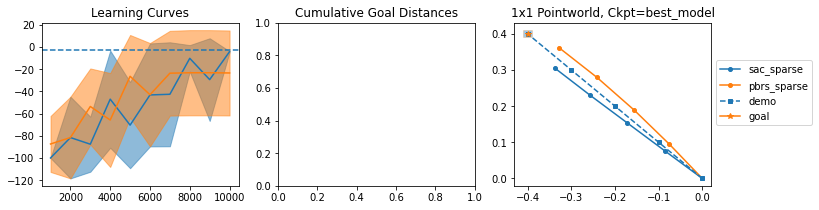

In [4]:
visualize(base_path, sparse_expt_dict, run_ids=[1, 2, 3, 4, 5])

#### Expt B: Does PBRS have benefits in the Dense Reward setting?

In [6]:
# Expt A: sparse reward results
# expt specifications
%env CUDA_VISIBLE_DEVICES=1
dense_expt_dict = {
    "sac_dense": {"task_vars": ["time_feat"],
            "task_log_name": "sac_dense_n-step=3",
            "train_fn": train_sac,
            "expt_params": {**global_sac_exp_params,
                            "sparse_rew": False
                           }
              },
    "pbrs_dense": {"task_vars": ["time_feat",  "potential"],
             "task_log_name": "pbrs_dense_n-step=3",
             "train_fn": train_sac,
             "expt_params": {**global_sac_exp_params,
                             "sparse_rew": False
                            }
              },
}

run_expts(dense_expt_dict, n_runs=5)

env: CUDA_VISIBLE_DEVICES=1


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Could not seed environment <PointWorld instance>
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<TimeFeatureWrapper<TimeLimit<PointWorld instance>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f6f50707588>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-37.00 +/- 0.00
Episode length: 38.00 +/- 0.00
New best mean reward!
Eval num_timesteps=4000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6000, episode_reward=-6.00 +/- 0.00
Episode length: 7.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<TimeFeatureWrapper<TimeLimit<PointWorld instance>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f71c54d77f0>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-48.00 +/- 0.00
Episode length: 49.00 +/- 0.00
New best mean reward!
Eval num_timesteps=8000, episode_reward=-5.00 +/- 0.00
Episode length: 6.00 +/- 0.00
New best mean reward!
Eval num_timesteps=9000, episode_reward=-5.00 +/- 0.00
Episode length: 6.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<TimeFeatureWrapper<TimeLimit<PointWorld instance>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f6f406c9128>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=-5.00 +/- 0.00
Episode length: 6.00 +/- 0.00
New best mean reward!
Eval num_timesteps=7000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=8000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<TimeFeatureWrapper<TimeLimit<PointWorld instance>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f6f507bff98>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-8.00 +/- 0.00
Episode length: 9.00 +/- 0.00
New best mean reward!
Eval num_timesteps=3000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-7.00 +/- 0.00
Episode length: 8.00 +/- 0.00
New best mean reward!
Eval num_timesteps=5000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<TimeFeatureWrapper<TimeLimit<PointWorld instance>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f71b4515c50>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-14.00 +/- 0.00
Episode length: 15.00 +/- 0.00
New best mean reward!
Eval num_timesteps=9000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<RewardWrapper<TimeFeatureWrapper<TimeLimit<PointWorld instance>>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f6f7067a9e8>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-8.00 +/- 0.00
Episode length: 9.00 +/- 0.00
New best mean reward!
Eval num_timesteps=3000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6000, episode_reward=-6.00 +/- 0.00
Episode length: 7.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<RewardWrapper<TimeFeatureWrapper<TimeLimit<PointWorld instance>>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f719ad93d68>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<RewardWrapper<TimeFeatureWrapper<TimeLimit<PointWorld instance>>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f6f487560b8>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-29.00 +/- 0.00
Episode length: 30.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=8000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<RewardWrapper<TimeFeatureWrapper<TimeLimit<PointWorld instance>>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f6f78713f60>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-7.00 +/- 0.00
Episode length: 8.00 +/- 0.00
New best mean reward!
Eval num_timesteps=3000, episode_reward=-21.00 +/- 0.00
Episode length: 22.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-8.00 +/- 0.00
Episode length: 9.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-5.00 +/- 0.00
Episode length: 6.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=7000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
-----------------------------------------
| current_lr              | 0.0003      |
| entropy                 | 1.2285105   |
| episodes     

/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<RewardWrapper<TimeFeatureWrapper<TimeLimit<PointWorld instance>>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f6f7067a588>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-37.00 +/- 0.00
Episode length: 38.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=7000, episode_reward=-6.00 +/- 0.00
Episode length: 7.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-4.00 +/- 0.00
Episode length: 5.00 +/- 0.00


Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


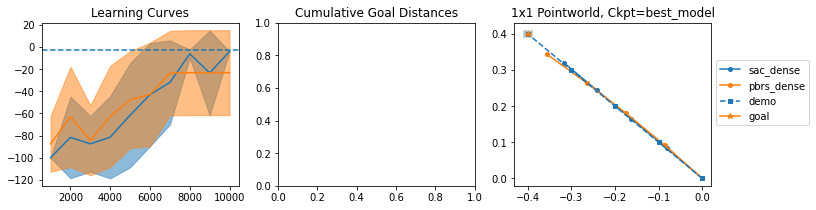

In [7]:
visualize(base_path, dense_expt_dict, run_ids=[1, 2, 3, 4, 5])

## TD3 on Pointworld

In [3]:
global_td3_exp_params = {
    "env_size": 1, 
    "goal": np.array([-0.4,  0.4]),
    "max_episode_steps": 100,
    "gradient_steps": 100,
#     "rew_delay": 20
}

### TD3 Sparse Reward

#### Experiment: Reward Base=-1, Comparison between SAC and SAC+PBRS

In [10]:
# Expt A: sparse reward results
# expt specifications
sparse_expt_dict = {
    "td3_sparse_rew-base=-1": {"task_vars": ["time_feat"],
            "task_log_name": "td3_sparse",
            "train_fn": train_td3,
            "expt_params": {**global_td3_exp_params,
                            "rew_base_value": -1,
                            "sparse_rew": True
                           }
              },
    "td3_pbrs_sparse_rew-base=-1": {"task_vars": ["time_feat",  "potential"],
             "task_log_name": "td3_pbrs_sparse",
             "train_fn": train_td3,
             "expt_params": {**global_td3_exp_params,
                             "rew_base_value": -1,
                             "sparse_rew": True
                            }
              },
}

# run_expts(sparse_expt_dict, n_runs=5)

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


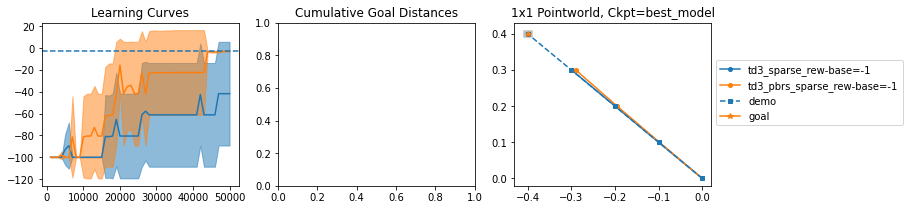

In [5]:
visualize(base_path, sparse_expt_dict, algo_name="td3", run_ids=[1, 2, 3, 4, 5])

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


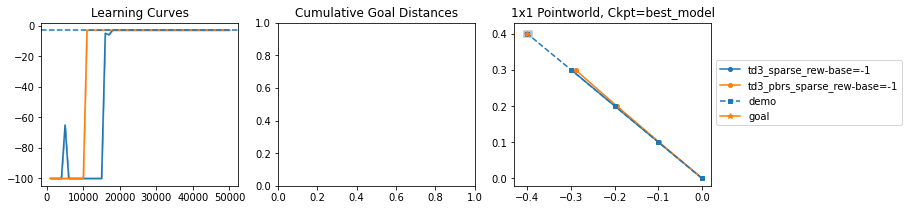

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


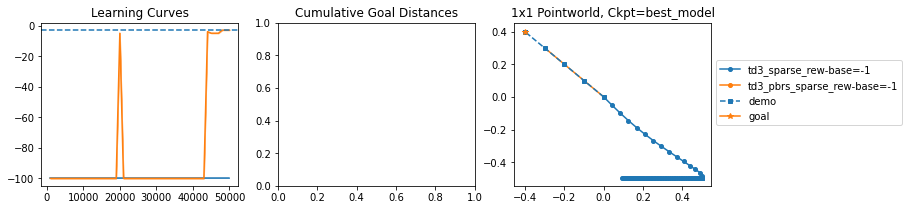

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


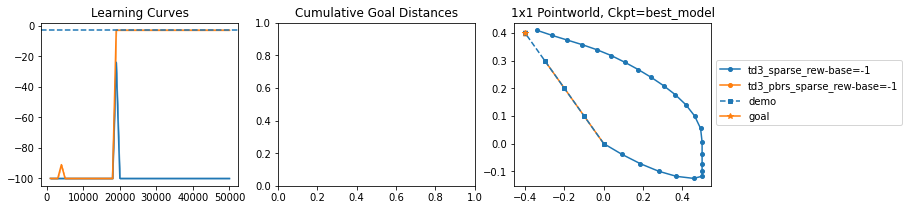

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


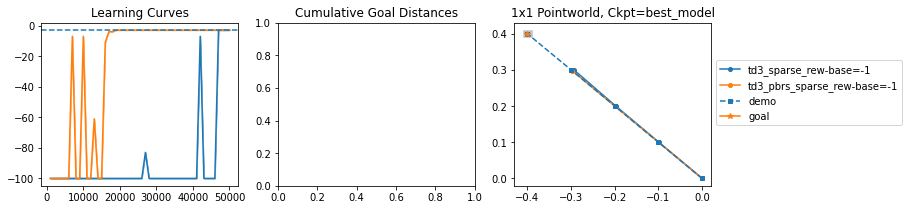

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


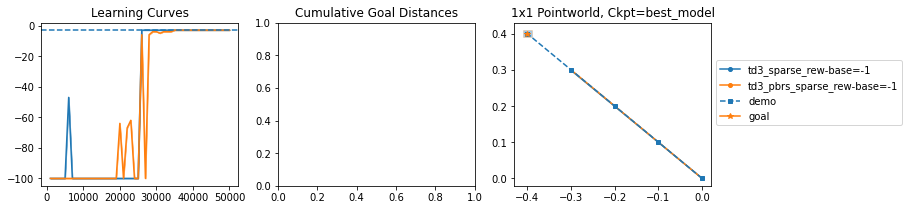

In [11]:
for run_id in [1, 2, 3, 4, 5]:
    visualize(base_path, sparse_expt_dict, algo_name="td3", run_ids=[run_id])

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


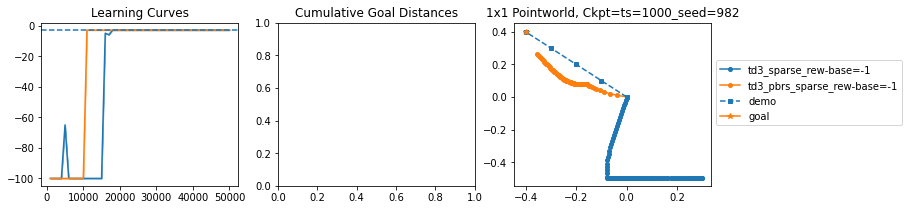

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


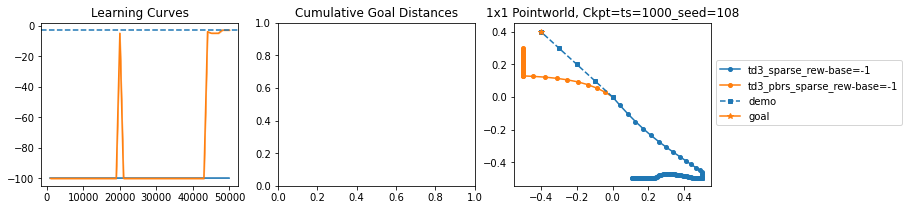

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


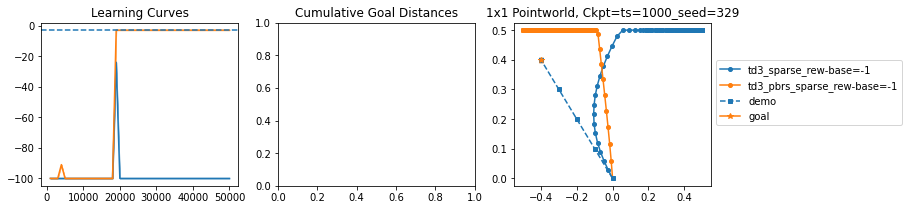

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


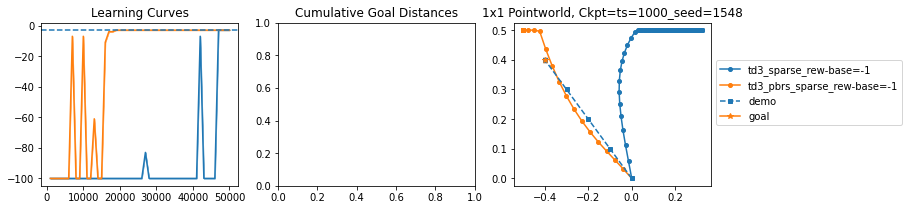

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


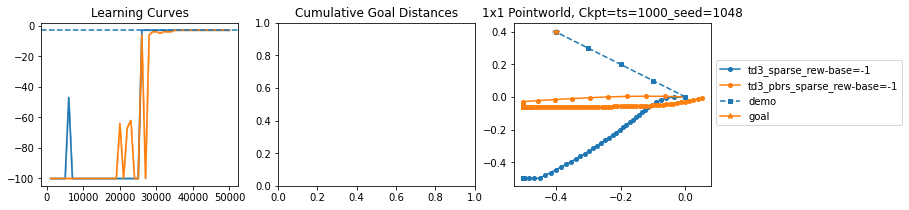

In [12]:
# early training visualization
seeds = [982, 108, 329, 1548, 1048]
for run_id in [1,2,3,4,5]:
    # early training
    visualize(base_path, sparse_expt_dict, algo_name="td3", run_ids=[run_id], ckpt_name=f"ts=1000_seed={seeds[run_id-1]}")

#### Expt: Reward Base=0

In [6]:
# expt specifications
sparse_expt_dict = {
    "td3_sparse_rew-base=0": {"task_vars": ["time_feat"],
            "task_log_name": "td3_sparse_rew-base=0",
            "train_fn": train_td3,
            "expt_params": {**global_td3_exp_params,
                            "rew_base_value": 0,
                            "sparse_rew": True
                           }
              },
    "td3_pbrs_sparse_rew-base=0": {"task_vars": ["time_feat",  "potential"],
             "task_log_name": "td3_pbrs_sparse_rew-base=0",
             "train_fn": train_td3,
             "expt_params": {**global_td3_exp_params,
                             "rew_base_value": 0,
                             "sparse_rew": True
                            }
              },
}

# run_expts(sparse_expt_dict, n_runs=5)

/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Could not seed environment <PointWorld instance>
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<TimeFeatureWrapper<TimeLimit<PointWorld instance>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f8acc0d59e8>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=11000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=12000, epis

/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<TimeFeatureWrapper<TimeLimit<PointWorld instance>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f8d6c156710>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=11000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=12000, epis

/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<TimeFeatureWrapper<TimeLimit<PointWorld instance>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f8aa8692f98>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=11000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=12000, epis

/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<TimeFeatureWrapper<TimeLimit<PointWorld instance>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f8d481d6b70>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=11000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=12000, epis

/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<TimeFeatureWrapper<TimeLimit<PointWorld instance>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f8d3f116128>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=11000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=12000, epis

/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<RewardWrapper<TimeFeatureWrapper<TimeLimit<PointWorld instance>>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f8acc166e10>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=4000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=11000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=12000, 

/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<RewardWrapper<TimeFeatureWrapper<TimeLimit<PointWorld instance>>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f8d7497d438>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=11000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=12000, episode_reward=1.00 +/- 0.

/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<RewardWrapper<TimeFeatureWrapper<TimeLimit<PointWorld instance>>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f8acc6fa7b8>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=3000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=11000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=12000, ep

/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<RewardWrapper<TimeFeatureWrapper<TimeLimit<PointWorld instance>>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f8d74993cc0>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=1.00 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=11000, episode_reward=1.00 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=12000, episode_reward=1.00 

/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<RewardWrapper<TimeFeatureWrapper<TimeLimit<PointWorld instance>>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f8d63919f98>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=11000, episode_reward=0.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=12000, epis

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


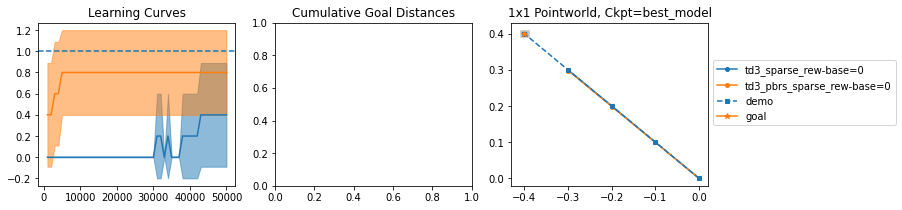

In [7]:
visualize(base_path, sparse_expt_dict, algo_name="td3", run_ids=[1, 2, 3, 4, 5])

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


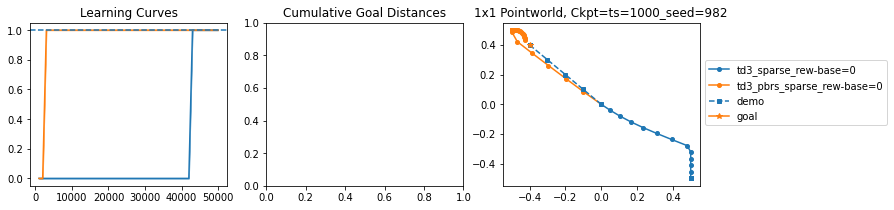

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


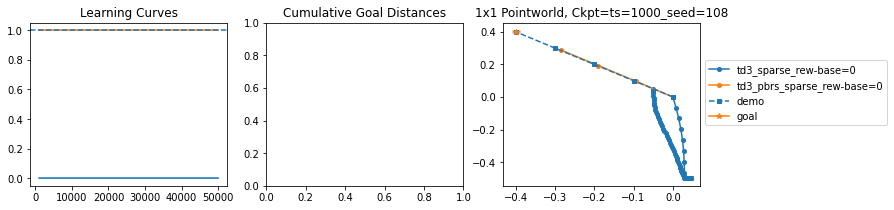

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


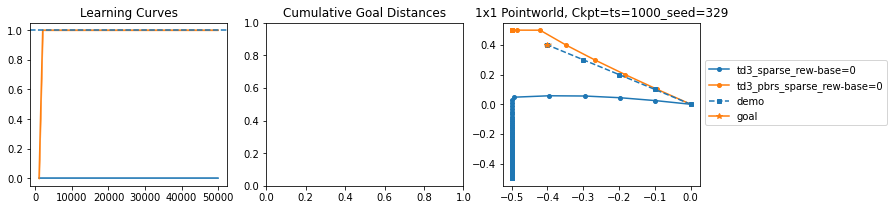

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


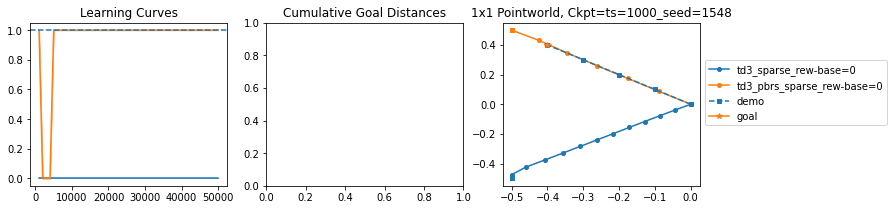

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


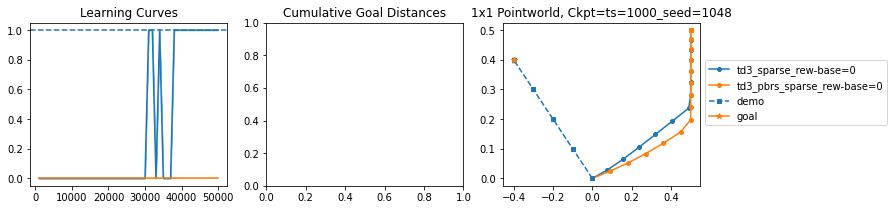

In [9]:
# early training visualization
seeds = [982, 108, 329, 1548, 1048]
for run_id in [1,2,3,4,5]:
    # early training
    visualize(base_path, sparse_expt_dict, algo_name="td3", run_ids=[run_id], ckpt_name=f"ts=1000_seed={seeds[run_id-1]}")

#### Experiment: Increasing Frequency of Value Function Updates

Hypothesis: bias from PBRS affects the value function. We need to make sure that this information propagates to the policy. 

In [9]:
# expt specifications
sparse_expt_dict = {
    "td3_pbrs_sparse_rew-base=0_policy-delay=2": {"task_vars": ["time_feat"],
            "task_log_name": "td3_pbrs_sparse_rew-base=0",
            "train_fn": train_td3,
            "expt_params": {**global_td3_exp_params,
                            "rew_base_value": 0,
                            "sparse_rew": True
                           }
              },
    "td3_pbrs_sparse_rew-base=0_policy-delay=5": {"task_vars": ["time_feat",  "potential"],
             "task_log_name": "td3_pbrs_sparse_rew-base=0_policy-delay=5",
             "train_fn": train_td3,
             "expt_params": {**global_td3_exp_params,
                             "rew_base_value": 0,
                             "sparse_rew": True,
                             "policy_delay": 5
                            }
              },
    "td3_pbrs_sparse_rew-base=0_policy-delay=10": {"task_vars": ["time_feat",  "potential"],
             "task_log_name": "td3_pbrs_sparse_rew-base=0_policy-delay=10",
             "train_fn": train_td3,
             "expt_params": {**global_td3_exp_params,
                             "rew_base_value": 0,
                             "sparse_rew": True,
                             "policy_delay": 10
                            }
              },

}

# run_expts(sparse_expt_dict, n_runs=5)

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


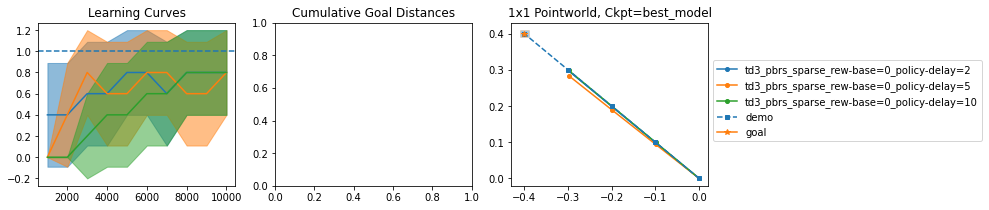

In [10]:
visualize(base_path, sparse_expt_dict, algo_name="td3", run_ids=[1,2,3,4,5])

### TD3 Dense Reward

In [11]:
# Expt B: dense reward results
# expt specifications
dense_expt_dict = {
    "td3_dense": {"task_vars": ["time_feat"],
            "task_log_name": "td3_dense",
            "train_fn": train_td3,
            "expt_params": {**global_td3_exp_params,
                            "sparse_rew": False
                           }
              },
    "td3_pbrs_dense": {"task_vars": ["time_feat",  "potential"],
             "task_log_name": "td3_pbrs_dense",
             "train_fn": train_td3,
             "expt_params": {**global_td3_exp_params,
                             "sparse_rew": False
                            }
              },
}

run_expts(dense_expt_dict, n_runs=5)

/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Could not seed environment <PointWorld instance>
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<TimeFeatureWrapper<TimeLimit<PointWorld instance>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7fe998785e80>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<TimeFeatureWrapper<TimeLimit<PointWorld instance>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7fe998647710>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<TimeFeatureWrapper<TimeLimit<PointWorld instance>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7fe998689160>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=-81.00 +/- 0.00
Episode length: 82.00 +/- 0.00
New best mean reward!
Eval num_timesteps=7000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<TimeFeatureWrapper<TimeLimit<PointWorld instance>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7fe9981c04e0>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<TimeFeatureWrapper<TimeLimit<PointWorld instance>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7feb07965400>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-22.00 +/- 0.00
Episode length: 23.00 +/- 0.00
New best mean reward!
Eval num_timesteps=5000, episode_reward=-10.00 +/- 0.00
Episode length: 11.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-8.00 +/- 0.00
Episode length: 9.00 +/- 0.00
New best mean reward!
Eval num_timesteps=9000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-35.00 +/- 0.00
Episode length: 36.00 +/- 0.00


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<RewardWrapper<TimeFeatureWrapper<TimeLimit<PointWorld instance>>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7feaee0c55f8>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<RewardWrapper<TimeFeatureWrapper<TimeLimit<PointWorld instance>>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7fe96b65cfd0>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-79.00 +/- 0.00
Episode length: 80.00 +/- 0.00
New best mean reward!
Eval num_timesteps=10000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<RewardWrapper<TimeFeatureWrapper<TimeLimit<PointWorld instance>>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7feab2cb3d68>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=-74.00 +/- 0.00
Episode length: 75.00 +/- 0.00
New best mean reward!
Eval num_timesteps=7000, episode_reward=-67.00 +/- 0.00
Episode length: 68.00 +/- 0.00
New best mean reward!
Eval num_timesteps=8000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<RewardWrapper<TimeFeatureWrapper<TimeLimit<PointWorld instance>>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7feaf6992c50>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/stable_baselines/common/callbacks.py:277: UserWarning: Training and eval env are not of the same type<RewardWrapper<TimeFeatureWrapper<TimeLimit<PointWorld instance>>>> != <stable_baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7feb4831d898>
  "{} != {}".format(self.training_env, self.eval_env))


Eval num_timesteps=1000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
New best mean reward!
Eval num_timesteps=2000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=3000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=4000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=5000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=6000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=7000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=8000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=9000, episode_reward=-100.00 +/- 0.00
Episode length: 100.00 +/- 0.00
Eval num_timesteps=10000, episode_reward=-54.00 +/- 0.00
Episode length: 55.00 +/- 0.00
New best mean reward!


Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


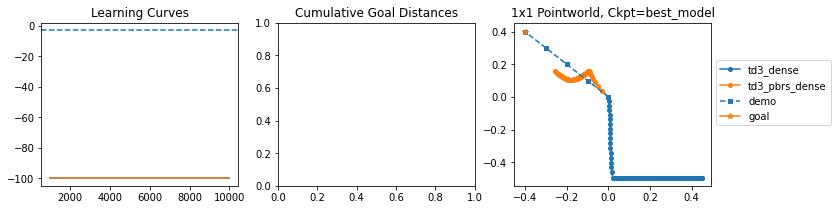

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


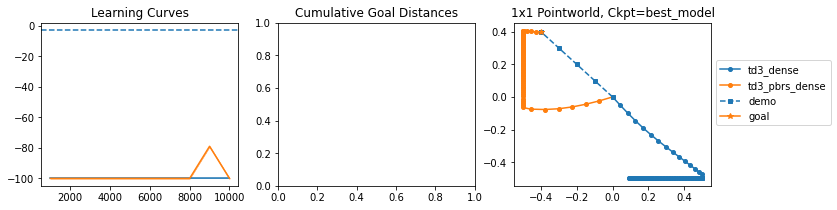

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


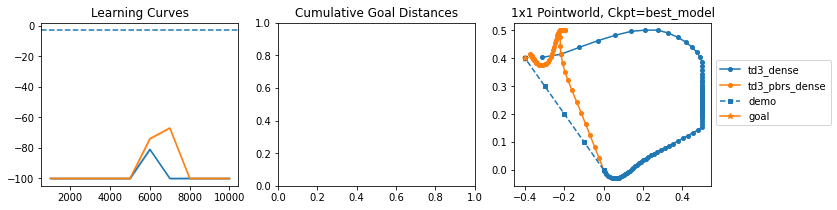

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


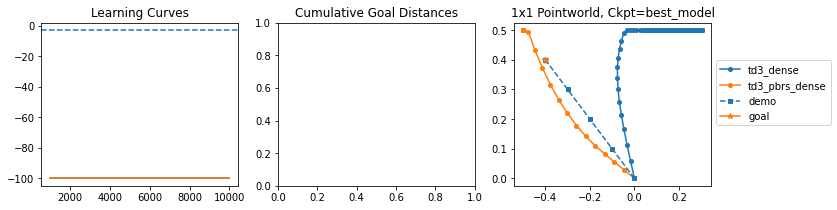

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


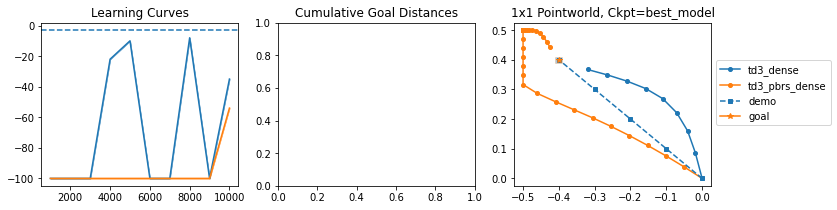

In [17]:
for run_id in [1,2,3,4,5]:
    visualize(base_path, dense_expt_dict, algo_name="td3", run_ids=[run_id])

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


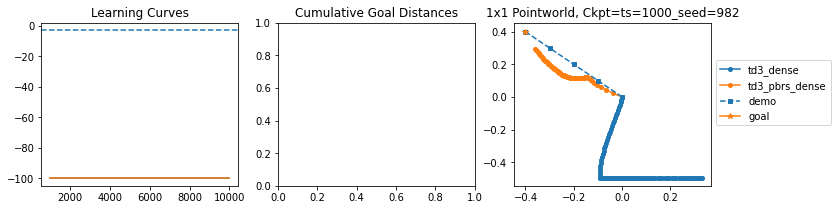

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


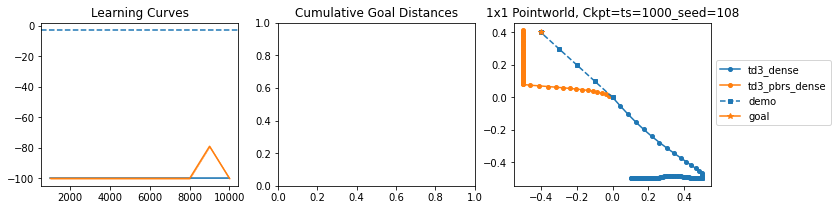

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


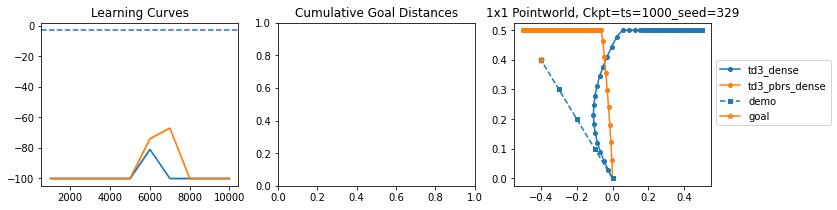

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


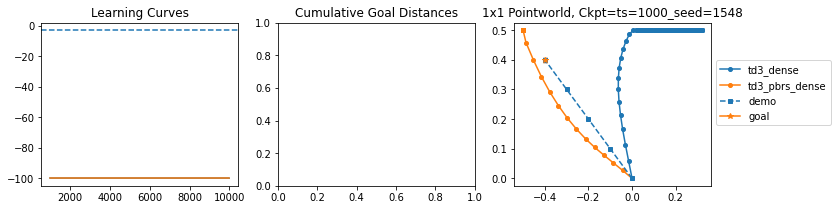

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


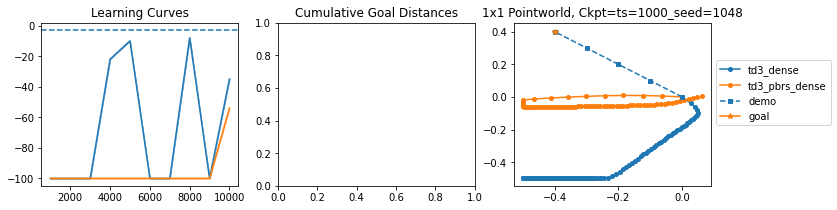

In [21]:
# early training visualization
seeds = [982, 108, 329, 1548, 1048]
for run_id in [1,2,3,4,5]:
    # early training
    visualize(base_path, dense_expt_dict, algo_name="td3", run_ids=[run_id], ckpt_name=f"ts=1000_seed={seeds[run_id-1]}")